# Image Processing

#### Import Libraries

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.image as mpimg

In [9]:
%matplotlib inline

### Directory Inquery

In [10]:
pwd

'/Users/dibakarsigdel/Desktop/nmn-rch-image'

In [11]:
ls

1-14-2017- Mela Awith Collagen on PDMS-5mM kcl+others  rError Signal002.tiff
1-14-2017- Mela Awith Collagen on PDMS-5mM kcl+others  rTopography002.tiff
1-14-2017- Mela Awith Collagen on PDMS-5mM kcl+others  rZ Detector002.tiff
Image.ipynb
current.tiff
image-processing.ipynb
image-saver/
potential.tiff


------------

### Upload Image

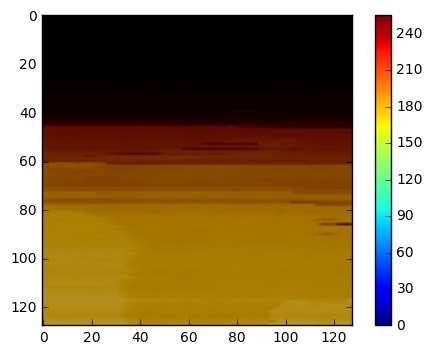

In [43]:
imgc=mpimg.imread('current.tiff')
imgplot = plt.imshow(imgc)
plt.colorbar()

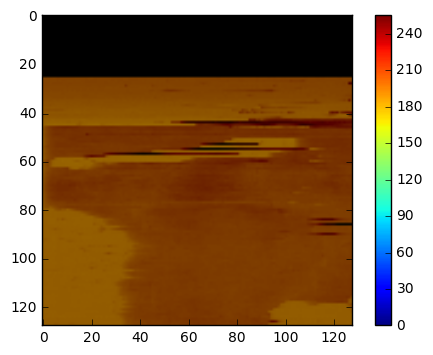

In [44]:
imgp=mpimg.imread('potential.tiff')
imgplot = plt.imshow(imgp)
plt.colorbar()

### Difference

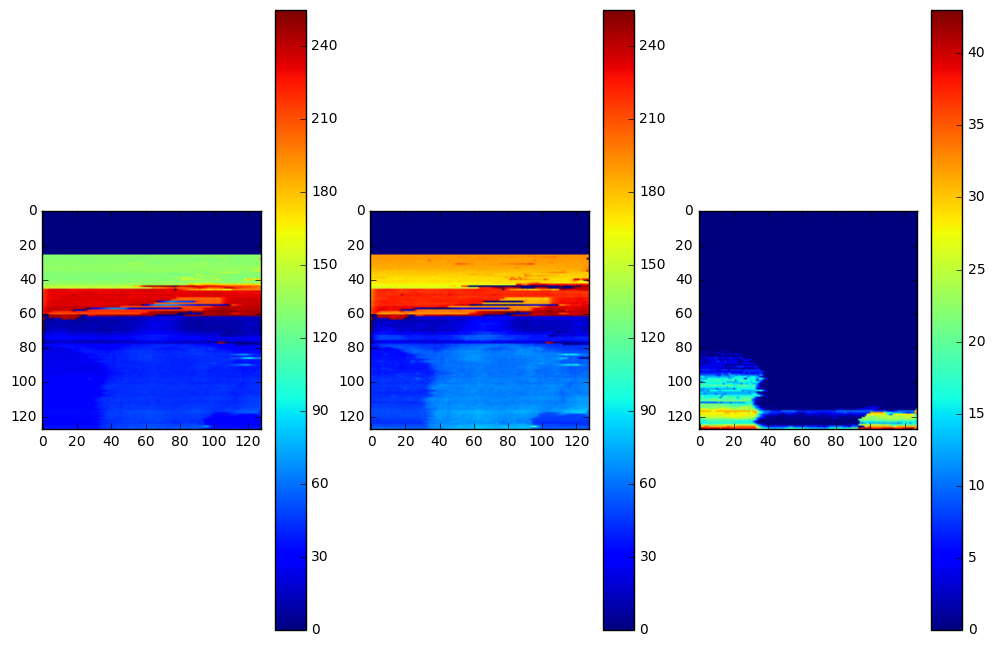

In [78]:

plt.figure(figsize =(12,8))
plt.subplot(1,3,1)
diff1 = (imgc[:,:,0]-imgp[:,:,0])
imgplot = plt.imshow(diff1)
plt.colorbar()

plt.subplot(1,3,2)
diff2 = (imgc[:,:,1]-imgp[:,:,1])
imgplot = plt.imshow(diff2)
plt.colorbar()

plt.subplot(1,3,3)
diff3 = (imgc[:,:,2]-imgp[:,:,2])
imgplot = plt.imshow(diff3)
plt.colorbar()

In [79]:
diff1

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ..., 
       [32, 32, 33, ..., 31, 31, 31],
       [34, 34, 35, ..., 34, 34, 34],
       [38, 39, 38, ..., 37, 35, 38]], dtype=uint8)

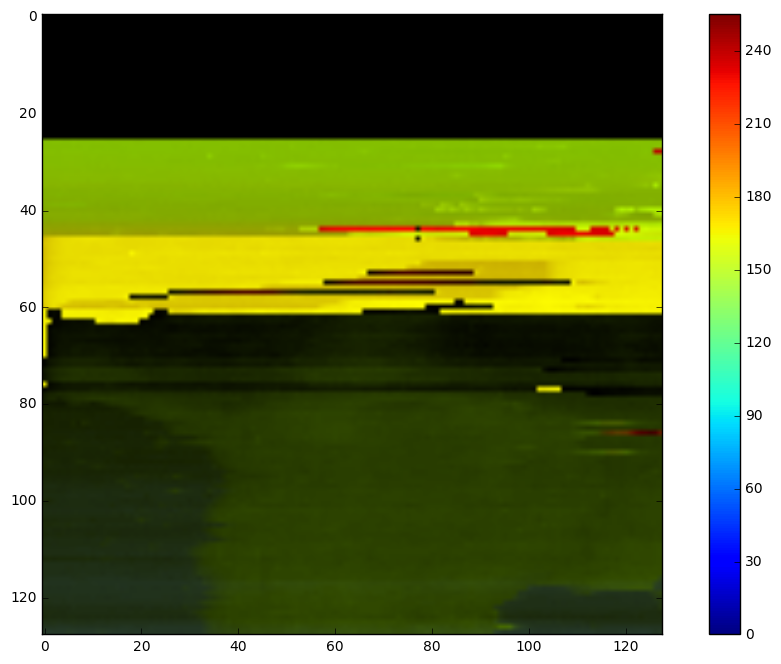

In [81]:

diff = imgc
plt.figure(figsize =(12,8))


diff1 = (imgc[:,:,0]-imgp[:,:,0])
diff2 = (imgc[:,:,1]-imgp[:,:,1])
diff3 = (imgc[:,:,2]-imgp[:,:,2])

diff[:,:,0] = diff1[:,:]
diff[:,:,1] = diff2[:,:]
diff[:,:,2] = diff3[:,:]

imgplot = plt.imshow(diff)
plt.colorbar()

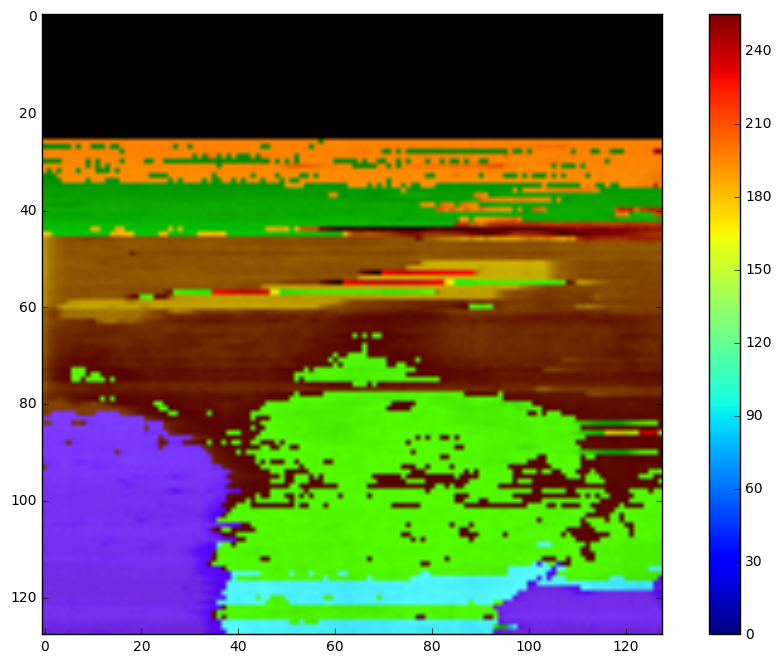

In [82]:
diff = imgc
plt.figure(figsize =(12,8))


diff1 = (imgp[:,:,0]-imgc[:,:,0])
diff2 = (imgp[:,:,1]-imgc[:,:,1])
diff3 = (imgp[:,:,2]-imgc[:,:,2])

diff[:,:,0] = diff1[:,:]
diff[:,:,1] = diff2[:,:]
diff[:,:,2] = diff3[:,:]

imgplot = plt.imshow(diff)
plt.colorbar()

--------------

In [29]:
imgc.shape,imgp.shape

((128, 128, 4), (128, 128, 4))

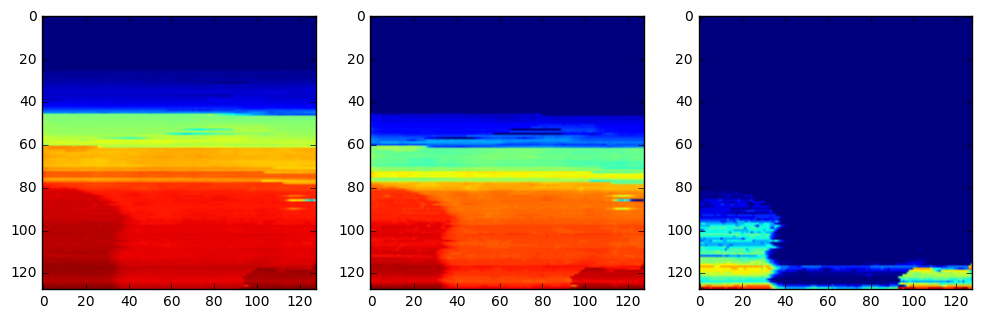

In [34]:
plt.figure(figsize =(12,8))
plt.subplot(1,3,1)
imgc1 = imgc[:,:,0]
plt.imshow(imgc1)

plt.subplot(1,3,2)
imgc2 = imgc[:,:,1]
plt.imshow(imgc2)

plt.subplot(1,3,3)
imgc3 = imgc[:,:,2]
plt.imshow(imgc3)

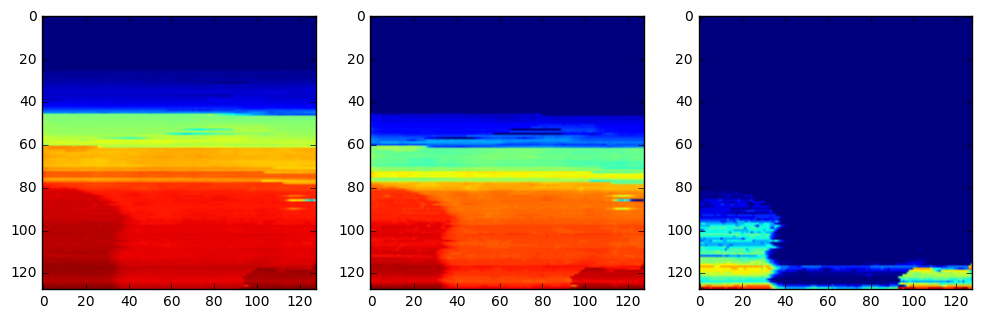

In [35]:
plt.figure(figsize =(12,8))
plt.subplot(1,3,1)
imgp1 = imgp[:,:,0]
plt.imshow(imgc1)

plt.subplot(1,3,2)
imgp2 = imgp[:,:,1]
plt.imshow(imgc2)

plt.subplot(1,3,3)
imgp3 = imgp[:,:,2]
plt.imshow(imgc3)

---------------

### Histogram

In [37]:
#plt.hist(imgc.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

--------

### Convolution

In [68]:
data = np.array(imgc[:,:,0])/255.0

In [69]:
# Create the filters
k3 = np.ones((3,3))/9.0
k5 = np.ones((5,5))/25.0

In [70]:
k3

array([[ 0.11111111,  0.11111111,  0.11111111],
       [ 0.11111111,  0.11111111,  0.11111111],
       [ 0.11111111,  0.11111111,  0.11111111]])

In [72]:
# Now the convolution
lp3 = ndimage.convolve(data, k3, mode='nearest')
lp5 = ndimage.convolve(data, k5, mode='nearest')

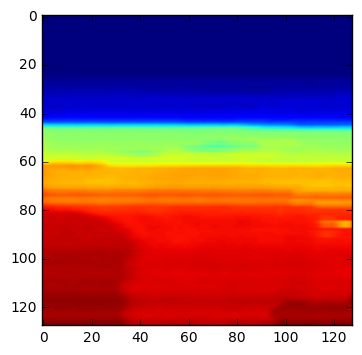

In [74]:
 plt.imshow(lp3)

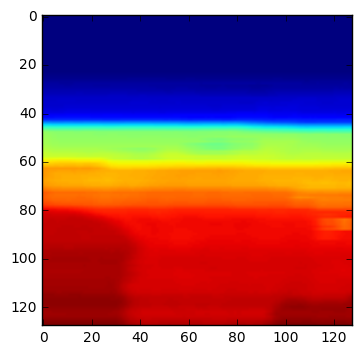

In [75]:
 plt.imshow(lp5)

In [76]:
mse3 = np.sum(np.power(lp3-data,2))/np.size(data)
mse5 = np.sum(np.power(lp5-data,2))/np.size(data)

#~ PSNR = 10*np.log10(np.power(MAXi,2)/MSE);
psnr3 = 10*np.log10(np.power(1.0,2)/mse3);
psnr5 = 10*np.log10(np.power(1.0,2)/mse5);

print (psnr3, psnr5)

37.405030111 35.7849892347


------------